In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [3]:
import os
all_dfs = []
directory = os.fsencode("face data/")
for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith("0.csv"): 
         all_dfs.append(pd.read_csv("face data/" + filename, header=None))
len(all_dfs)

12

In [4]:
data = pd.concat(all_dfs)
pd.set_option('display.max_rows', 10)
data

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0.0,0.408451,0.265000,0.242236,0.076923,0.061321,0.000000,0.000000,0.531915,0.748299,...,0.235294,0.196078,0.075581,0.011429,0.112426,0.000000,0.000000,0.014286,0.000000,0.000000
1,0.0,0.549505,0.320197,0.227778,0.098592,0.020513,0.000000,0.100000,0.325000,0.432432,...,0.062857,0.021739,0.138122,0.114650,0.092593,0.000000,0.222222,0.000000,0.000000,0.000000
2,0.0,0.158192,0.181395,0.135514,0.082192,0.037838,0.000000,0.248756,0.434146,0.546798,...,0.000000,0.103448,0.155039,0.000000,0.000000,0.000000,0.258065,0.333333,0.266667,0.037037
3,0.0,0.513369,0.213542,0.270968,0.103093,0.072165,0.000000,0.000000,0.306358,0.719424,...,0.167488,0.181818,0.000000,0.073034,0.025974,0.000000,0.000000,0.000000,0.000000,0.419355
4,0.0,0.295597,0.156757,0.133005,0.079208,0.054455,0.000000,0.116751,0.388889,0.557292,...,0.000000,0.013072,0.163934,0.000000,0.000000,0.000000,0.580645,0.205882,0.319149,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,10.0,0.861905,0.836449,0.643836,0.201970,0.333333,0.391061,0.189744,0.457547,0.182692,...,0.015789,0.036649,0.139175,0.078125,0.135678,0.138095,0.185000,0.641414,0.805263,0.766355
11,10.0,0.769737,0.853982,0.847619,0.852018,0.848485,0.879310,0.884956,0.994924,0.935961,...,0.043011,0.029412,0.064516,0.142105,0.128713,0.105727,0.095455,0.088608,0.029915,0.004405
12,10.0,0.846890,0.843750,0.836283,0.871560,0.640449,0.324324,0.190244,0.328638,0.470874,...,0.034483,0.072072,0.137405,0.093750,0.079787,0.070423,0.000000,0.004367,0.000000,0.000000
13,10.0,0.851852,0.856481,0.873874,0.868778,0.896396,1.000000,0.675393,0.287805,0.325123,...,0.104651,0.070922,0.105634,0.049505,0.075117,0.063063,0.000000,0.000000,0.000000,0.000000


In [5]:
X = data.iloc[:, [i for i in range(1, 2501)]]
Y = data.iloc[:, 0]

In [6]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.20, shuffle=True)

In [7]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', bootstrap=True)
classifier.fit(X_Train,Y_Train)

RandomForestClassifier(criterion='entropy', n_estimators=25)

In [8]:
from sklearn.metrics import accuracy_score
Y_Pred = classifier.predict(X_Test)
accuracy = accuracy_score(Y_Test, Y_Pred)
accuracy

0.9787234042553191

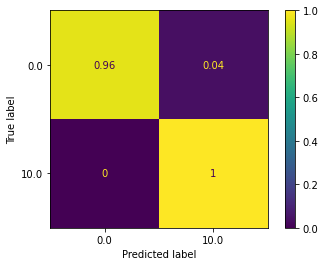

In [9]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_Test, Y_Test, normalize="true")

In [59]:
import joblib
joblib.dump(classifier, "rf_model.joblib")

['rf_model.joblib']